<a href="https://colab.research.google.com/github/irishakarpova/BlockChainPuller/blob/main/Book_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size=10>Data Science and Business Analytics</font>



# Book Review Analysis

## Problem Statement


### Business Context

In the book industry, keeping readers satisfied is essential for the success of individual books and the reputation of publishers. A global book platform wants to better understand and improve how readers feel about the books it offers. The company knows that reader reviews are a valuable way to learn about the quality of the writing, the strength of the story, and how much readers enjoy the book overall.

### Problem Definition

Even though there are plenty of reader reviews available, the company struggles to turn them into useful insights. Reading through large amounts of text by hand takes a lot of time and can’t be done efficiently at scale. The main challenges include:

**Unstructured Data:** Reader reviews are written in casual written language, which makes it hard to quickly find important information about the book’s content, writing style, and reader reactions.

**Large Volume of Reviews**: With thousands of books in many different genres, the platform collects a huge number of reviews. Going through all of them manually is not practical, so an automated approach is needed.

**Understanding Reader Sentiment:** Figuring out whether a review is positive, negative, or neutral can be difficult. But this is important for learning what readers like or don`t like, improving book suggestions, and helping with marketing and publishing decisions.

### Objective

The objective is to develop a sentiment analysis model leveraging a Large Language Model (LLM) to accurately classify reader sentiments—positive, negative, or neutral from unstructured book reviews. This model aims to enable scalable analysis of reader feedback, provide deeper insights into audience preferences, support data-driven editorial and marketing decisions, and ultimately enhance overall reader satisfaction on the platform.

## Installing and Importing Libraries

In [3]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 42.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 201.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 290.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.9/134.9 kB 382.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 324.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 308.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which

In [4]:
!pip install huggingface_hub==0.33.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 13.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.33.0
    Uninstalling huggingface-hub-0.33.0:
      Successfully uninstalled huggingface-hub-0.33.0


In [1]:
!pip uninstall -y numpy
!pip uninstall -y scikit-learn
!pip install numpy --upgrade --no-cache-dir
!pip install scikit-learn --upgrade --no-cache-dir

Found existing installation: numpy 2.3.1
Uninstalling numpy-2.3.1:
  Successfully uninstalled numpy-2.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 310.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
libpysal 4.13.0 requires scikit-learn>=1.1, which is not installed.
librosa 0.11.0 requires scikit-learn>=1.1.0, which is not installed.
hdbscan 0.8.40 requires scikit-learn>=0.20, which is not installed.
umap-learn 0.5.7 requires scikit-learn>=0.22, which is not installed.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, which is not installed.
tsfresh 0.21.0 requires scikit-learn>=0.22.0, which is not installed.
shap 0.48.0 requires scikit-learn, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not installed.
fastai 2.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 309.5 MB/s eta 0:00:00
^C


In [1]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 118.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [2]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

from tqdm.notebook import tqdm

# Compare true vs predicted
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Import the dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Generative AI/g_reviews.csv")

## Data Overview

In [4]:
df.head()

,ReviewText,Sentiment
0,Review #1: Highly disappointing read.,0
1,Review #2: A page-turner with a powerful message.,2
2,Review #3: A masterpiece of storytelling.,2
3,Review #4: Heartwarming and inspiring read.,2
4,"Review #5: Neither good nor bad, just fine.",1


In [7]:
data = df.copy()

In [15]:
data.shape

(1209, 2)

**Observations**

- Data has 1209 rows and 2 columns

In [282]:
# checking for missing values
data.isnull().sum()

,0
ReviewText,0
Sentiment,0


**Observations**

- There are no missing values in the data

In [283]:
# Count the number of reviews per sentiment
sentiment_counts = data['Sentiment'].value_counts().sort_index()

# Map sentiment labels for readability
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)

**Observation:**

1. The dataset is fairly balanced across all three sentiment categories:

- Positive: 33.5%
- Neutral: 34.2%
- Negative: 32.3%

2. It indicates that the dataset includes a good variety of reader opinions, which can help build a more generalizable model.

### Utility function

In [5]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_sentiment = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_sentiment)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## Llama Model Building

In [11]:
#This is Hugging Face model repository created by TheBloke, who publishes quantized GGUF-format models for use with llama.cpp
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [12]:
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [13]:
print(data.columns)

Index(['ReviewText', 'Sentiment'], dtype='object')


In [13]:
# I use T4 GPU GPU RAM 15.0 GB that is why n_gpu_layers=40

llm = Llama(
    model_path=model_path,
    n_ctx=4096,
    n_threads=8,
    n_gpu_layers=40,
    f16_kv=True,
    use_mmap=True,
    use_mlock=False
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

### Model Response Parameters

In [14]:
def generate_llama_response(instruction, review):
    prompt = f"""[INST] <<SYS>>
{instruction.strip()}
<</SYS>>

{review.strip()}
[/INST]"""

    response = llm(
        prompt=prompt,
        max_tokens=512,
        temperature=0,
        top_p=1.0,
        top_k=0,
        repeat_penalty=1.0,
        echo=False,
        seed=42,
    )

    return response["choices"][0]["text"].strip()

### 1. Sentiment Analysis (Llama)

In [15]:
# creating a copy of the data
# data_1 = data.copy()
data_1 = data.iloc[:100].copy()

In [16]:

# defining the instructions for the model

instruction = """
You are a sentiment classifier.

Read the following book review and respond with exactly one word:
Positive, Neutral, or Negative.

Do not include any greetings, explanations, or extra text.
Only respond with one of the three words — exactly as written.
"""

In [17]:
# Import tqdm for progress tracking in notebooks
from tqdm.notebook import tqdm

# Enable progress bar for pandas apply functions
tqdm.pandas()

# Apply the LLaMA model to each review and generate a sentiment prediction
data_1['model_response'] = data_1['ReviewText'].progress_apply(
    lambda x: generate_llama_response(instruction, x)
)

  0%|          | 0/100 [00:00<?, ?it/s]


llama_print_timings:        load time =     518.97 ms
llama_print_timings:      sample time =       0.17 ms /     4 runs   (    0.04 ms per token, 23809.52 tokens per second)
llama_print_timings: prompt eval time =     518.77 ms /    97 tokens (    5.35 ms per token,   186.98 tokens per second)
llama_print_timings:        eval time =     154.48 ms /     3 runs   (   51.49 ms per token,    19.42 tokens per second)
llama_print_timings:       total time =     686.67 ms /   100 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     518.97 ms
llama_print_timings:      sample time =       0.16 ms /     4 runs   (    0.04 ms per token, 24390.24 tokens per second)
llama_print_timings: prompt eval time =     495.57 ms /    17 tokens (   29.15 ms per token,    34.30 tokens per second)
llama_print_timings:        eval time =     154.25 ms /     3 runs   (   51.42 ms per token,    19.45 tokens per second)
llama_print_timings:       total time =     659.78 ms /    20 

In [18]:
# Checking what the input review looked like before being sent to LLaMA
i = 10
print(data_1.loc[i, 'ReviewText'])

Review #11: Plain narrative, suitable for casual reading.


In [19]:
# Checking what the input review looked like before being sent to LLaMA
i = 10
print(data_1.loc[i, 'model_response'])

Neutral


In [20]:
# Extract standardized sentiment label from LLaMA's raw text output

def extract_sentiment(text):
    text = str(text).lower()
    if "positive" in text:
        return "Positive"
    elif "negative" in text:
        return "Negative"
    elif "neutral" in text:
        return "Neutral"
    else:
        return "Unknown"

In [21]:
# Applying the function to the model response
data_1['Sentiment_model_res'] = data_1['model_response'].apply(extract_sentiment)
data_1['Sentiment_model_res'].head(11)

,Sentiment_model_res
0,Negative
1,Positive
2,Positive
3,Positive
4,Neutral
5,Positive
6,Negative
7,Neutral
8,Neutral
9,Neutral


In [22]:
# This gives a quick overview of how many reviews were labeled as Positive, Neutral, Negative, or Unknown
data_1['Sentiment_model_res'].value_counts()

,count
Sentiment_model_res,
Positive,37
Neutral,37
Negative,26


In [23]:
# Debugging why the sentiment couldn't be extracted correctly
data_1[data_1['Sentiment_model_res'] == 'Unknown']['model_response'].head(5).tolist()


[]

In [24]:
# Store the cleaned version of the dataset in final_data_1
final_data_1 = data_1.drop(['model_response'], axis=1)
final_data_1.head()

,ReviewText,Sentiment,Sentiment_model_res
0,Review #1: Highly disappointing read.,0,Negative
1,Review #2: A page-turner with a powerful message.,2,Positive
2,Review #3: A masterpiece of storytelling.,2,Positive
3,Review #4: Heartwarming and inspiring read.,2,Positive
4,"Review #5: Neither good nor bad, just fine.",1,Neutral


#### LLaMA vs. True Sentiment Labels: Evaluation of Prediction Accuracy

In [25]:

# Normalize predictions
data_1['model_response'] = data_1['model_response'].str.strip().str.capitalize()

# Map LLaMA predictions to numeric values
sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
data_1['Sentiment_model_res'] = data_1['model_response'].map(sentiment_map)

# Drop invalid predictions
data_eval = data_1.dropna(subset=['Sentiment_model_res'])

y_true = data_eval['Sentiment_model_res']
y_pred = data_eval['Sentiment_model_res']

accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive'])
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        22
     Neutral       1.00      1.00      1.00        24
    Positive       1.00      1.00      1.00        31

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



**Summary:**
- Accuracy: 1.0: Indicates the model predicted every label correctly

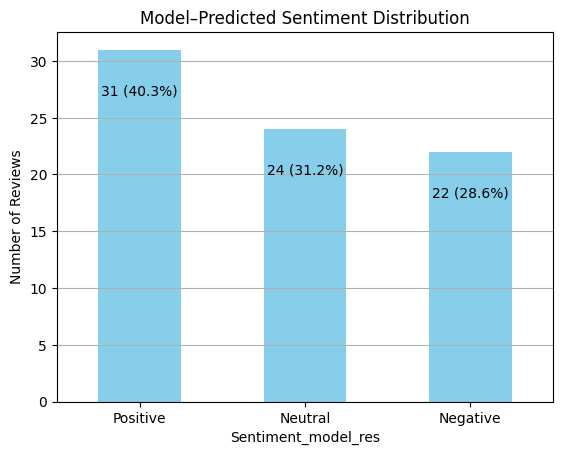

In [26]:
import matplotlib.pyplot as plt

# Map numeric sentiment to label
sentiment_labels = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
labelled_counts = data_1['Sentiment_model_res'].map(sentiment_labels).value_counts()
total = labelled_counts.sum()

# Plot
labelled_counts.plot(kind='bar', color='skyblue')
plt.title("Model–Predicted Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y')

# Add count and percentage on top of bars
for i, (label, count) in enumerate(labelled_counts.items()):
    percent = (count / total) * 100
    plt.text(i, count - 4, f'{count} ({percent:.1f}%)', ha='center', fontsize=10)

plt.show()

plt.show()

**Overall Sentiment Classification Using LLaMA:**

In the first stage of the project, I used a Large Language Model (LLaMA) to classify the overall sentiment of book reviews as Positive, Neutral, or Negative. Each review was passed through the model using a structured prompt designed to restrict the output to a single sentiment label.

The raw predictions were then cleaned and standardized using a custom parsing function to ensure consistency across all outputs.

### 2. Understanding Reader Sentiment with LLaMA: Overall Sentiment, Aspect-Level Insights, and Liked/Disliked Features

In [28]:
# Create a copy of the first 200 rows from the original dataset for faster processing
data_4 = data.iloc[:100].copy()

In [29]:
# defining the instructions for the model

instruction_2 = """
You are an AI analyzing book reviews.

Your task is to:
1. Classify the **overall sentiment** of the review as one of the following **exact** words:
   - "Positive"
   - "Negative"
   - "Neutral"

2. Determine the sentiment of the following aspects of the book using one of:
   - "Positive"
   - "Negative"
   - "Neutral"
   - "Not Applicable" (if not mentioned)

   Aspects:
   - Writing Style
   - Emotional Impact

3. Identify liked and/or disliked features for the following:
   - Pacing
   - Ending

Return a list of quoted features for each. If no features are found, return an empty list.

4. Write a polite, empathetic response to the customer. Begin with a thank you. Then:
   - If **Positive**, say you’re glad they enjoyed the book and would love to have them read again.
   - If **Neutral**, thank them and ask what could have improved their experience.
   - If **Negative**, apologize and say their feedback will be reviewed.

Output only the **exact JSON object below** — nothing else. All values must be strings. Lists must contain strings in double quotes.

{
    "Overall Sentiment": "your_sentiment_prediction",
    "Writing Style": "your_sentiment_prediction",
    "Emotional Impact": "your_sentiment_prediction",
    "Pacing": ["liked or disliked features"],
    "Ending": ["liked or disliked features"],
    "Response": "your_response_to_the_customer_review"
}
"""



In [30]:
# Apply the LLaMA model to each review and generate a sentiment prediction
tqdm.pandas()
data_4['model_response'] = data_4['ReviewText'].progress_apply(
    lambda x: generate_llama_response(instruction_2, x)
)

  0%|          | 0/100 [00:00<?, ?it/s]

Llama.generate: prefix-match hit

llama_print_timings:        load time =     518.97 ms
llama_print_timings:      sample time =      13.09 ms /   315 runs   (    0.04 ms per token, 24064.17 tokens per second)
llama_print_timings: prompt eval time =    1012.92 ms /   444 tokens (    2.28 ms per token,   438.33 tokens per second)
llama_print_timings:        eval time =   23699.80 ms /   314 runs   (   75.48 ms per token,    13.25 tokens per second)
llama_print_timings:       total time =   25679.93 ms /   758 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     518.97 ms
llama_print_timings:      sample time =      19.09 ms /   444 runs   (    0.04 ms per token, 23253.38 tokens per second)
llama_print_timings: prompt eval time =     560.70 ms /    17 tokens (   32.98 ms per token,    30.32 tokens per second)
llama_print_timings:        eval time =   34207.97 ms /   443 runs   (   77.22 ms per token,    12.95 tokens per second)
llama_print_timings:       to

In [31]:
i = 1
print(data_4.loc[i, 'ReviewText'])

Review #2: A page-turner with a powerful message.


In [32]:
print(data_4.loc[i, 'model_response'])

Sure, I'd be happy to help you analyze the review! Here's the JSON object with my predictions:

{
    "Overall Sentiment": "Positive",
    "Writing Style": "Positive",
    "Emotional Impact": "Positive",
    "Pacing": ["fast-paced"],
    "Ending": ["satisfying"],
    "Response": "Thank you for your positive review! We're glad you enjoyed the book and found it to be a page-turner with a powerful message. We hope you'll continue to read more of our books in the future."
}

Here's how I arrived at these predictions:

1. Overall Sentiment: The review expresses a positive sentiment towards the book, so I classified it as "Positive".
2. Writing Style: The reviewer mentions that the book is a "page-turner", which suggests that the writing style is engaging and fast-paced. Therefore, I classified the aspect of "Writing Style" as "Positive".
3. Emotional Impact: The reviewer mentions that the book has a "powerful message", which suggests that it had an emotional impact on them. Therefore, I cla

In [33]:
# applying the function to the model response
data_4['model_response_parsed'] = data_4['model_response'].apply(extract_json_data)
data_4['model_response_parsed'].head()

,model_response_parsed
0,"{'Overall Sentiment': 'Negative', 'Writing Sty..."
1,"{'Overall Sentiment': 'Positive', 'Writing Sty..."
2,"{'Overall Sentiment': 'Positive', 'Writing Sty..."
3,"{'Overall Sentiment': 'Positive', 'Writing Sty..."
4,"{'Overall Sentiment': 'Neutral', 'Writing Styl..."


In [34]:
# Filter rows where the parsed JSON result is an empty dictionary
data_4[data_4.model_response_parsed == {}]

,ReviewText,Sentiment,model_response,model_response_parsed


In [35]:
# Each key in the JSON becomes a column, and each value becomes a row cell.
model_response_parsed_df_4 = pd.json_normalize(data_4['model_response_parsed'])
model_response_parsed_df_4.head()

,Overall Sentiment,Writing Style,Emotional Impact,Pacing,Ending,Response
0,Negative,Negative,Negative,[disliked],[disliked],Sorry to hear that you didn't enjoy the book. ...
1,Positive,Positive,Positive,[fast-paced],[satisfying],Thank you for your positive review! We're glad...
2,Positive,Positive,Positive,[liked],[liked],Thank you so much for your positive review! We...
3,Positive,Positive,Positive,[liked],[liked],Thank you so much for your review! We're glad ...
4,Neutral,Neutral,Neutral,[Not Applicable],[Not Applicable],Thank you for your review! We're glad you foun...


In [36]:
#Merge
data_with_parsed_model_output_4 = pd.concat([data_4, model_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head(10)

,ReviewText,Sentiment,model_response,model_response_parsed,Overall Sentiment,Writing Style,Emotional Impact,Pacing,Ending,Response
0,Review #1: Highly disappointing read.,0,"Sure, I'd be happy to help you analyze the rev...","{'Overall Sentiment': 'Negative', 'Writing Sty...",Negative,Negative,Negative,[disliked],[disliked],Sorry to hear that you didn't enjoy the book. ...
1,Review #2: A page-turner with a powerful message.,2,"Sure, I'd be happy to help you analyze the rev...","{'Overall Sentiment': 'Positive', 'Writing Sty...",Positive,Positive,Positive,[fast-paced],[satisfying],Thank you for your positive review! We're glad...
2,Review #3: A masterpiece of storytelling.,2,"Sure, I'd be happy to help you analyze the rev...","{'Overall Sentiment': 'Positive', 'Writing Sty...",Positive,Positive,Positive,[liked],[liked],Thank you so much for your positive review! We...
3,Review #4: Heartwarming and inspiring read.,2,"Sure, I'd be happy to help you analyze the rev...","{'Overall Sentiment': 'Positive', 'Writing Sty...",Positive,Positive,Positive,[liked],[liked],Thank you so much for your review! We're glad ...
4,"Review #5: Neither good nor bad, just fine.",1,"Sure, I'd be happy to help you analyze this bo...","{'Overall Sentiment': 'Neutral', 'Writing Styl...",Neutral,Neutral,Neutral,[Not Applicable],[Not Applicable],Thank you for your review! We're glad you foun...
5,Review #6: Absolutely loved this book!,2,"Sure, I'd be happy to help you with that! Here...","{'Overall Sentiment': 'Positive', 'Writing Sty...",Positive,Positive,Positive,[Liked],[Liked],Thank you so much for your review! We're glad ...
6,Review #7: Overhyped and underwhelming.,0,"Sure, I'd be happy to help you analyze this bo...","{'Overall Sentiment': 'Negative', 'Writing Sty...",Negative,Negative,Negative,[underwhelming],[disliked],Thank you for sharing your feedback. Sorry to ...
7,"Review #8: Some parts were slow, overall reada...",1,"Sure, I'd be happy to help you analyze this bo...","{'Overall Sentiment': 'Neutral', 'Writing Styl...",Neutral,Neutral,Neutral,[slow],[not applicable],Thank you for your review! We're glad you foun...
8,"Review #9: Had its moments, but not remarkable.",1,"Sure, I'd be happy to help you analyze this bo...","{'Overall Sentiment': 'Neutral', 'Writing Styl...",Neutral,Neutral,Neutral,[Not Applicable],[Not Applicable],Thank you for taking the time to share your th...
9,"Review #10: Neutral feelings, not very impactful.",1,"Sure, I'd be happy to help! Here's the analysi...","{'Overall Sentiment': 'Neutral', 'Writing Styl...",Neutral,Neutral,Neutral,[Not Applicable],[Not Applicable],Thank you for taking the time to share your th...


In [37]:
# Create a final, cleaned dataset by removing raw model output columns
final_data_4 = data_with_parsed_model_output_4.drop(['model_response','model_response_parsed'], axis=1)
final_data_4.head()

,ReviewText,Sentiment,Overall Sentiment,Writing Style,Emotional Impact,Pacing,Ending,Response
0,Review #1: Highly disappointing read.,0,Negative,Negative,Negative,[disliked],[disliked],Sorry to hear that you didn't enjoy the book. ...
1,Review #2: A page-turner with a powerful message.,2,Positive,Positive,Positive,[fast-paced],[satisfying],Thank you for your positive review! We're glad...
2,Review #3: A masterpiece of storytelling.,2,Positive,Positive,Positive,[liked],[liked],Thank you so much for your positive review! We...
3,Review #4: Heartwarming and inspiring read.,2,Positive,Positive,Positive,[liked],[liked],Thank you so much for your review! We're glad ...
4,"Review #5: Neither good nor bad, just fine.",1,Neutral,Neutral,Neutral,[Not Applicable],[Not Applicable],Thank you for your review! We're glad you foun...


In [38]:
pd.crosstab(
    final_data_4['Writing Style'],
    final_data_4['Overall Sentiment'],
    normalize='index'
).round(2) * 100

Overall Sentiment,Negative,Neutral,Positive
Writing Style,,,
Decent,0.0,100.0,0.0
Negative,100.0,0.0,0.0
Neutral,20.0,80.0,0.0
Positive,0.0,0.0,100.0


**Key Findings**:

- Reviews that describe the writing style positively are strongly aligned with positive overall sentiment.
- Reviews rating the writing style as neutral are mostly linked to neutral or positive overall sentiment, but the positivity rate is noticeably lower than with positive writing style.
- Although few reviews explicitly rated writing style as negative, those that did were almost exclusively tied to negative overall sentiment.

## LLM-Based Multi Sentiment Analysis Pipeline

- Overall Sentiment Detection
I started by identifying the overall sentiment of each review using the LLM.

- Aspect-Based Sentiment Analysis
Next, I extracted sentiment for specific aspects of the book—such as writing style, pacing better understand which elements influenced the reader's opinion.

- Liked and Disliked Features
I also identified what readers liked or disliked about each aspect, providing more detailed insights (e.g., “engaging writing style,” “rushed ending”).

- Automated Customer Response
Finally, I generated a personalized response for each review, reflecting the tone and content of the reader's feedback.
